**Лабораторная работа 5**



> Задание 1

Исследовать зависимость относительной погрешности решения системы уравнений Ax=f от величины μA при различных ||δA|| и ||δf||.




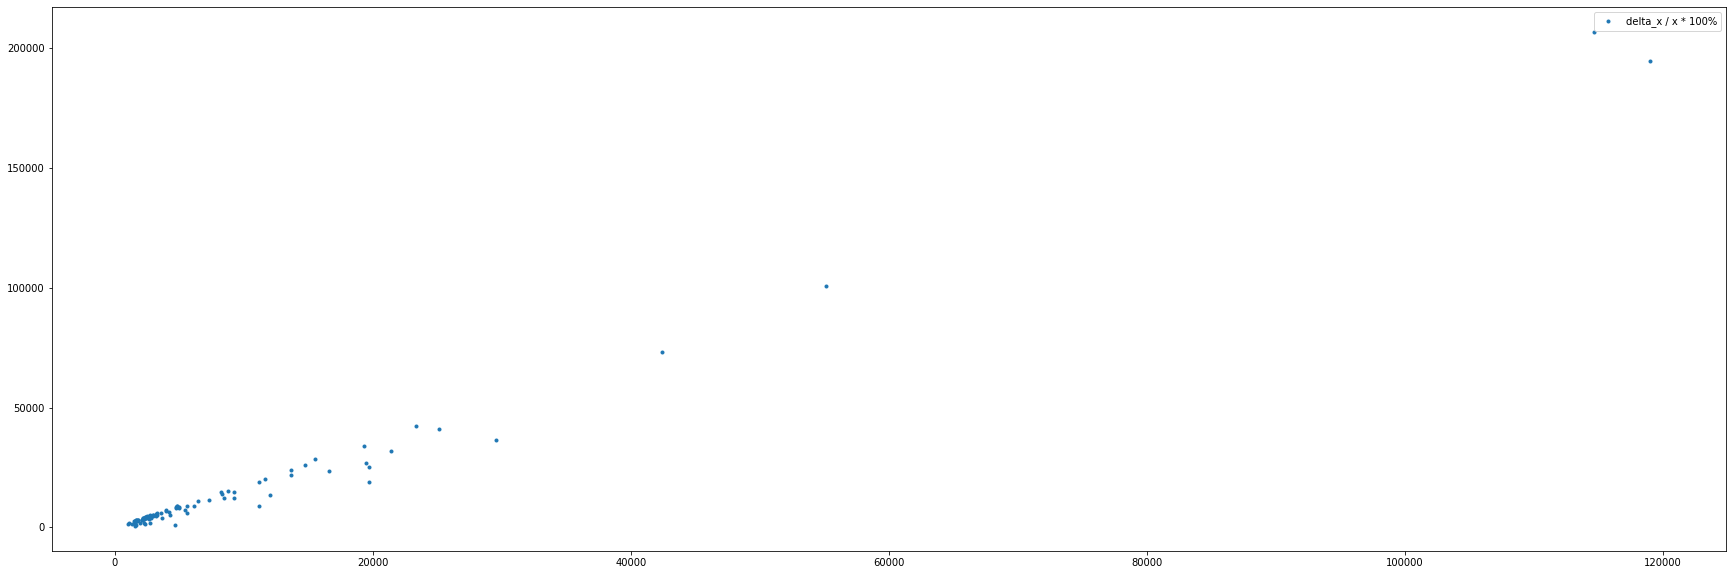

In [ ]:
import numpy as np
import random
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D


def get_random(a, b):
    return random.random() * (b - a) + a


def matrix_norm(matr):
  max_str_sum = -1.0
  for row in matr:
    sum = 0.0
    for i in row:
      sum += abs(i)
    if sum > max_str_sum:
      max_str_sum = sum

  return max_str_sum


def vector_norm(vec):
  norm = -1.0
  for i in vec:
    if abs(i) > norm:
      norm = abs(i)

  return norm


def matrix_inverse(matr):
  return np.linalg.inv(matr)


def get_res(matr, f):
  return np.dot(matrix_inverse(matr), f)


def matrix_generic(n, a):
  res = []
  for i in range(n):
    str = []
    for j in range(n):
      str.append(get_random(-a, a))
    res.append(str)
  return res


def vector_generic(n, a):
  str = []
  for j in range(n):
    str.append(get_random(-a, a)) 
  return str


def get_mu_matrix(matr):
  return matrix_norm(matr) * matrix_norm(matrix_inverse(matr))


results_x = []
results_y = []
results_z = []
results_z2 = []

percent = 0.05
deltas = [0.01, 0.02, 0.03, 0.04, 0.05]

for i in range(100):
  matrix = matrix_generic(100, 10 + i)
  delta_matrix = matrix_generic(100, 0.01 + i * deltas[0])

  vector = vector_generic(100, 10 + i)
  delta_vector = vector_generic(100, 0.01 + i * deltas[0])

  mu = get_mu_matrix(matrix)

  res = mu * (vector_norm(delta_vector) / vector_norm(vector) + matrix_norm(delta_matrix) / matrix_norm(matrix))

  results_x.append(mu)
  results_y.append(res * 100)
  results_z.append(matrix_norm(delta_matrix) / matrix_norm(matrix))
  results_z2.append(vector_norm(delta_vector) / vector_norm(vector))

fig = matplotlib.pyplot.figure(figsize=(30, 10))
# matplotlib.pyplot.figure().add_subplot(111, projection='3d')
results_x = np.array(results_x)
results_y = np.array(results_y)
results_z = np.array(results_z)

matplotlib.pyplot.plot(results_x, results_y, '.')
matplotlib.pyplot.legend(['delta_x / x * 100%'])





> Задание 2

* Построить трехмерный график зависимости ||δx||÷||x|| от μA и ||δA||÷||A||
* Построить трехмерный график зависимости ||δx||÷||x|| от μA и ||δf||÷||f||





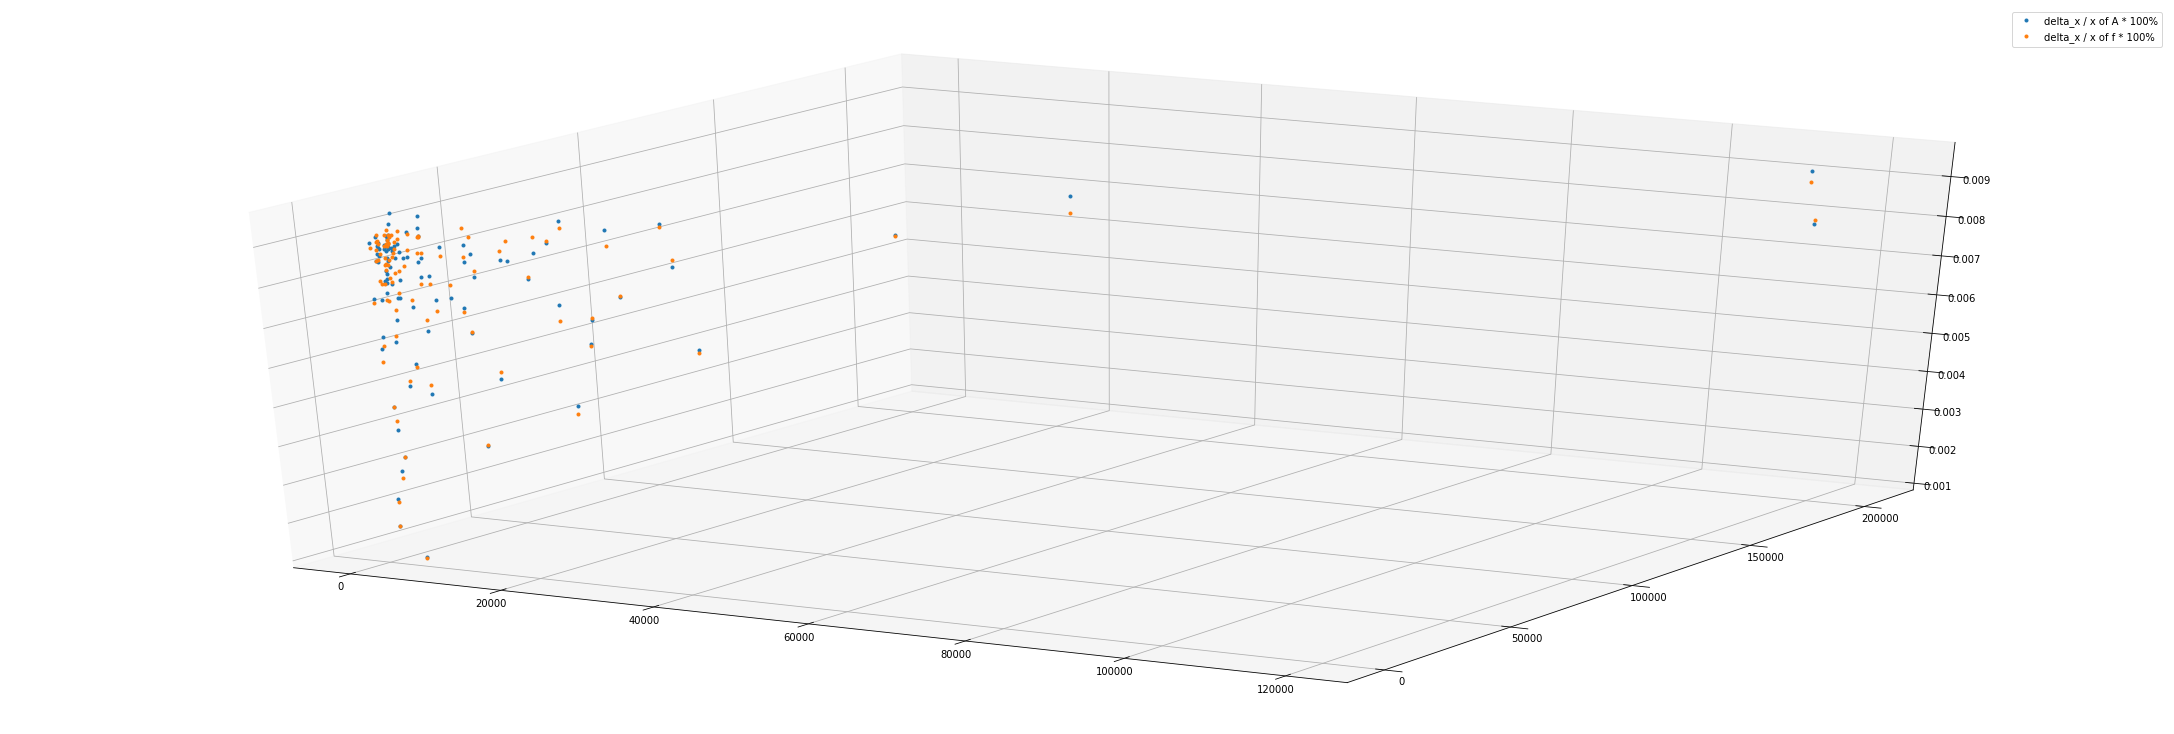

In [ ]:
fig = matplotlib.pyplot.figure(figsize=(30, 10))
# matplotlib.pyplot.figure().add_subplot(111, projection='3d')
results_x = np.array(results_x)
results_y = np.array(results_y)
results_z = np.array(results_z)

matplotlib.pyplot.plot(results_x, results_y, '.')
matplotlib.pyplot.legend(['delta_x / x * 100%'])

ax = Axes3D(fig)
Axes3D.plot(ax, results_x, results_y, results_z, '.')
Axes3D.plot(ax, results_x, results_y, results_z2, '.')
matplotlib.pyplot.legend(['delta_x / x of A * 100%', 'delta_x / x of f * 100%'])


> Задание 3

Добавить в решение Задания 1 график зависимости погрешностей вычислений ||δx||÷||x|| от μA и сравнить



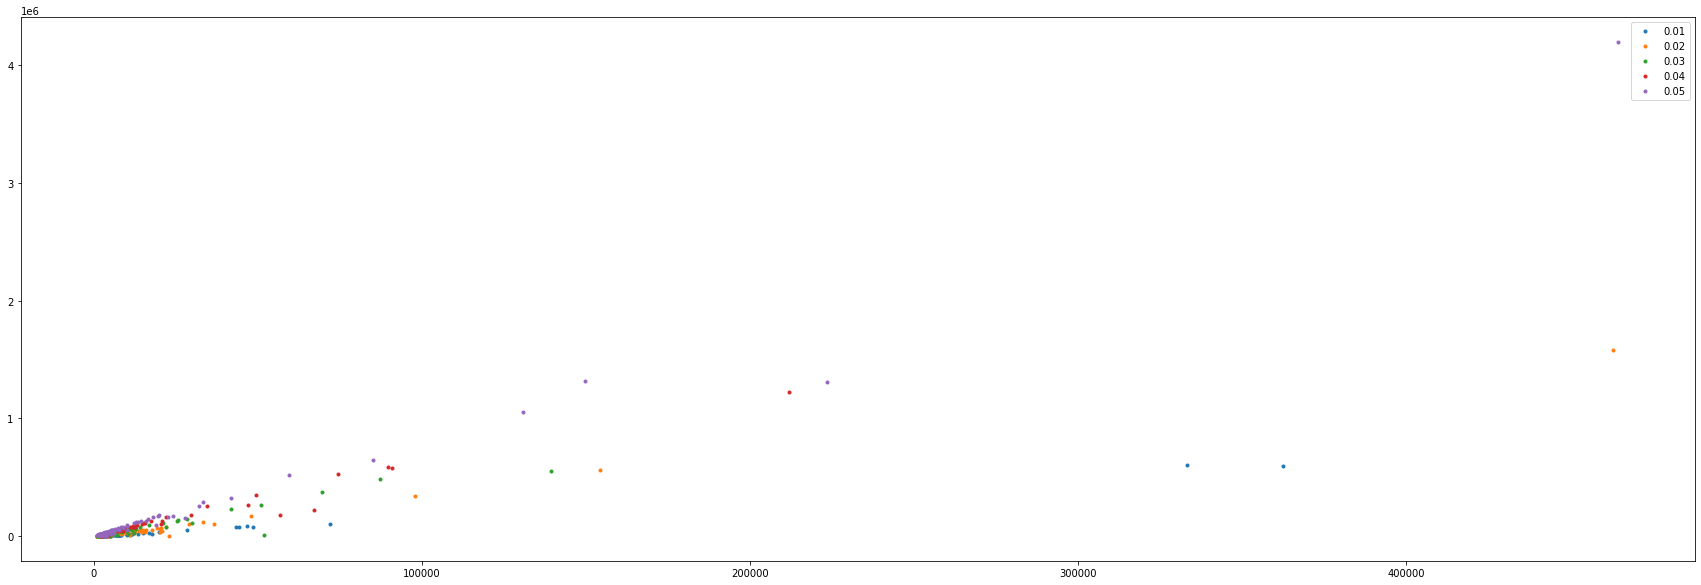

In [ ]:
results_x = [[] for _ in range(5)]
results_y = [[] for _ in range(5)]

for i in range(100):
  for j in range(len(deltas)):
    matrix = matrix_generic(100, 10 + i)
    delta_matrix = matrix_generic(100, 0.01 + i * deltas[j])

    vector = vector_generic(100, 10 + i)
    delta_vector = vector_generic(100, 0.01 + i * deltas[j])

    mu = get_mu_matrix(matrix)

    res = mu * (vector_norm(delta_vector) / vector_norm(vector) + matrix_norm(delta_matrix) / matrix_norm(matrix))

    results_x[j].append(mu)
    results_y[j].append(res * 100)

fig = matplotlib.pyplot.figure(figsize=(30, 10))
# matplotlib.pyplot.figure().add_subplot(111, projection='3d')
for j in range(len(deltas)):
  matplotlib.pyplot.plot(results_x[j], results_y[j], '.')
matplotlib.pyplot.legend(['0.01', '0.02', '0.03', '0.04', '0.05'])
